# 图像阈值
## 简单阈值法
如果像素值大于阈值，则会被赋为一个值（可能为白色），否则会赋为另一个值（可能为黑色）
1. **THRESH_BINARY**:像素值大于阈值的像素设置为最大值，小于等于阈值的像素设置为0。
2. **THRESH_BINARY_INV**：与THRESH_BINARY相反，像素值大于阈值的像素设置为0，小于等于阈值的像素设置为最大值。

3. **THRESH_TRUNC**：像素值大于阈值的像素设置为阈值，小于等于阈值的像素保持不变。

4. **THRESH_TOZERO**：像素值大于阈值的像素保持不变，小于等于阈值的像素设置为0。

5. **THRESH_TOZERO_INV**：与THRESH_TOZERO相反，像素值大于阈值的像素设置为0，小于等于阈值的像素保持不变

<class 'list'>


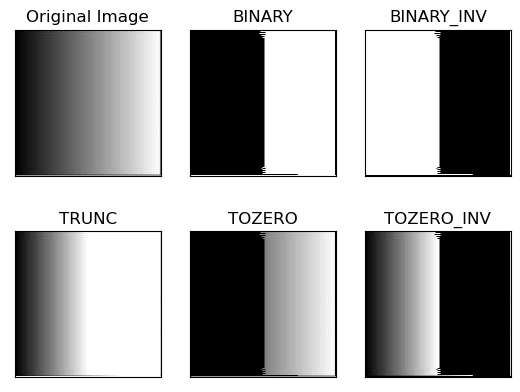

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('gradient.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
print(type(images))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## 自适应阈值
1. **全局阈值化**：使用固定的阈值对整个图像进行二值化。
2. **自适应均值阈值化**：根据邻域内像素值的平均值来计算阈值，并将阈值应用于整个图像。(所有像素权重一样)  
能够根据图像不同区域的亮度变化自适应地确定阈值，从而更好地保留图像的细节信息。这在处理亮度不均匀或光照变化较大的图像时特别有用。  
3. **自适应高斯阈值化**：根据邻域内像素值的加权平均值（使用高斯窗口）来计算阈值，并将阈值应用于整个图像。
自适应高斯阈值化在处理具有不均匀光照和对比度差异的图像时表现较好，能够更好地保留图像细节。然而，计算复杂度较高和参数选择的影响是需要考虑的因素。
高斯窗口是一种在图像处理中常用的窗口函数。它是由**高斯函数（正态分布）**在二维空间上计算得到的。  

**所想**: 二值化这个东西很有意思,从之前到现在学的图像处理都是首先将彩色图转换为灰度图(或者直接用灰度模式加载),然后把图像通过阈值化转化为二进制图.  

彩色图像相比灰度图像包含了更多的颜色信息，能够提供更为丰富的视觉感知和细节信息。而灰度图像则更加简化，注重图像的亮度变化，适用于某些特定的图像处理任务。  

**注意**:medianBlur()函数是进行了中值滤波  


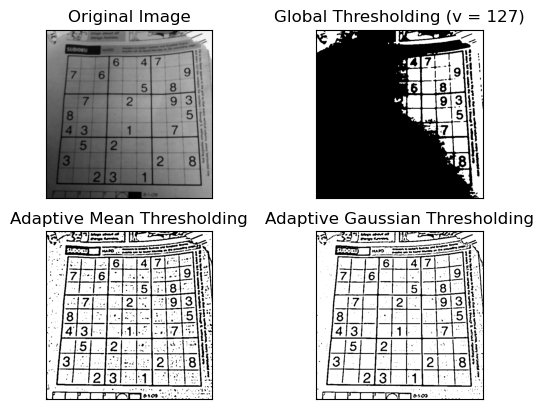

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 读取数独图片，并转换为灰度图像
img = cv.imread('../data/sudoku.png', 0)

# 对图像进行中值滤波
img = cv.medianBlur(img, 5)

# 全局阈值化
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# 自适应均值阈值化
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# 自适应高斯阈值化
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# 设置标题和图像列表
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# 显示图像和标题
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# 展示图像
plt.show()


## Otsu 二值化

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/noisy2.png',0)
# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu 阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 经过高斯滤波的 Otsu 阈值
#blur =img
blur = cv.GaussianBlur(img,(5,5),0)
#貌似dia
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_OTSU)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# 画出所有的图像和他们的直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


In [2]:
import cv2 as cv
import numpy as np

img = cv.imread('../data/noisy2.png', 0)
# 高斯模糊
blur = cv.GaussianBlur(img, (5, 5), 0)

# 找到归一化直方图还有累计分布函数
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()

Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

for i in range(1, 256):
    # 概率
    p1, p2 = np.hsplit(hist_norm, [i])
    # 概率
    q1, q2 = Q[i], Q[255] - Q[i]
    # 权重
    b1, b2 = np.hsplit(bins, [i])

    # 计算两个类别的均值
    m1 = np.sum(p1 * b1) / q1 if q1 != 0 else 0
    m2 = np.sum(p2 * b2) / q2 if q2 != 0 else 0

    # 计算两个类别的方差
    v1 = np.sum(((b1 - m1) ** 2) * p1) / q1 if q1 != 0 else 0
    v2 = np.sum(((b2 - m2) ** 2) * p2) / q2 if q2 != 0 else 0

    # 计算加权方差函数
    fn = v1 * q1 + v2 * q2

    if fn < fn_min:
        fn_min = fn
        thresh = i

# 使用Otsu阈值方法计算阈值
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print("{} {}".format(thresh, ret))


120 119.0
